In [108]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole

from lstm_chem.utils.config import process_config
from lstm_chem.model import LSTMChem
from lstm_chem.finetuner import LSTMChemFinetuner
from lstm_chem.data_loader import DataLoader
import random

import pandas as pd
from rdkit.Chem import PandasTools

In [2]:
config = process_config('experiments/2020-03-24/LSTM_Chem/config.json')

modeler = LSTMChem(config, session='finetune')
finetune_dl = DataLoader(config, data_type='finetune')

finetuner = LSTMChemFinetuner(modeler, finetune_dl)
finetuner.finetune()

Loading model architecture from experiments/2020-03-24/LSTM_Chem/model_arch.json ...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


  0%|                                                                                           | 0/99 [00:00<?, ?it/s]

Loading model checkpoint from experiments/2020-03-24/LSTM_Chem/checkpoints/LSTM_Chem-22-0.45.hdf5 ...
Loaded the Model.
loading SMILES...
done.
tokenizing SMILES...


100%|███████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 24813.92it/s]


done.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/12
99/99 [==============================] - 16s 157ms/step - loss: 1.4731
Epoch 2/12
99/99 [==============================] - 14s 139ms/step - loss: 1.1483
Epoch 3/12
99/99 [==============================] - 14s 140ms/step - loss: 1.0977
Epoch 4/12
99/99 [==============================] - 14s 140ms/step - loss: 1.0361
Epoch 5/12
99/99 [==============================] - 13s 136ms/step - loss: 0.9955
Epoch 6/12
99/99 [==============================] - 13s 134ms/step - loss: 0.9337
Epoch 7/12
99/99 [==============================] - 14s 137ms/step - loss: 0.9347
Epoch 8/12
99/99 [==============================] - 14s 137ms/step - loss: 0.8865
Epoch 9/12
99/99 [==============================] - 13s 136ms/step - loss: 0.8749
Epoch 10/12
99/99 [==============================] - 14s 139ms/step - loss: 0.8491
Epoch 11/12
99/99 [============================

### Model Finetuned, Generate SMILES

In [33]:
import pandas as pd
df = pd.DataFrame()
columns = ["smiles"]

finetuned_sampled_smiles = finetuner.sample(num=1000)
print(finetuned_sampled_smiles)
df["smiles"] = finetuned_sampled_smiles
df.to_csv("generated_smiles_finetuned_corona_virus.csv", header = True, columns = columns, index = False)


['CC(=O)N1CCN(C(=O)C2=CC=C(Br)C2)CC1', 'CC(=O)N1CCN(C(=O)c2ccccc2O)CC1', 'CC(=O)N1CCN(S(=O)(=O)c2ccccc2F)CC1', 'O=C(NCc1ccccc1)c1ccccc1', 'CC(=O)N1CCN(Cc2ccccc2)CC1', 'CC(=O)N1CCC(CC2=CC=CC2=O)CC1', 'CC(=O)N1CCN(C(=O)c2cccc(C)c2)CC1', 'CC(=O)N1CCN(S(=O)(=O)c2ccccc2)CC1', 'CC(=O)N1CCN(S(=O)(=O)c2ccccc2)CC1', 'CC(=O)N1CCN(Cc2ccccc2)CC1', 'CC(=O)N1CCN(C(=O)c2ccccc2)CC1', 'CC(=O)C1CCN(CCCNC(=O)Nc2ccc(C)cc2)CC1', 'CC(=O)N1CCN(Cc2ccccc2F)CC1', 'O=C(Nc1cc2ccccc2[nH]1)C1CCCCC1', 'CNc1ccccc1S(=O)(=O)C1CCN(C(C)=O)CC1', 'CC(=O)N1CCN(CC2=CC=C(F)C2)CC1', 'CC(=O)Nc1ccc2c(c1)OCO2', 'Fc1ccccc1CN1CCOCC1', 'Cc1ccc(NC(=O)Nc2ccc(C#N)cc2)cc1', 'CC(=O)N1CCN(Cc2ccc(Cl)cc2)CC1', 'CCNc1ccc(NCC(=O)Nc2ccccc2[N+](=O)[O-])cc1', 'OCCOCCO', 'CC(=O)N1CCN(CC2CCCCC2)CC1', 'O=C(NCCCCc1ccccc1)C1CCCCC1', 'Nc1ccc(NC(=O)NC2CCCCC2)cc1', 'CC(=O)N1CCN(C(=O)c2ccccc2)CC1', 'CC(=O)N1CCN(S(=O)(=O)c2ccccc2F)CC1', 'NS(=O)(=O)CCN1CCOCC1', 'CC(=O)Nc1ccc(CNCC(=O)NC(N)=O)cc1', 'CC(=O)N1CCN(Cc2ccccc2)CC1', 'CC(=O)N1CCC(c2ccccc2)CC1', 'CC

### Sampled smiles Generated, check percentage of valid smiles

In [35]:
# check if the smiles are valid

sampled_smiles = []
# suppl = []
# for x in finetuned_sampled_smiles:
#     suppl.append(Chem.MolFromSmiles(x))
# # suppl  = 
# for i, mol in enumerate(suppl):
#     sampled_smiles.append(Chem.MolToSmiles(mol) )

valid_mols = []
for smi in finetuned_sampled_smiles:
    mol = Chem.MolFromSmiles(smi)

    if mol is not None:
        valid_mols.append(mol)
# low validity
print('Percent of valid smiles : '+f'{len(valid_mols) /len(finetuned_sampled_smiles) :.2%}')

Percent of valid smiles : 100.00%


In [36]:
# what is this doing? 
with open('./datasets/known_inhibitors_for_corona_virus.smi') as f:
    ksmiles = [l.rstrip() for l in f]
kmols = [Chem.MolFromSmiles(smi) for smi in ksmiles]

# K = known inhibitors
Kfps = []
for mol in kmols:
    bv = AllChem.GetMACCSKeysFingerprint(mol)
    fp = np.zeros(len(bv))
    DataStructs.ConvertToNumpyArray(bv, fp)
    Kfps.append(fp)

Klen = len(Kfps)

In [37]:
# these were the 5 compounds taken from those 1400 compounds
with open('./datasets/known_inhibitors_for_corona_virus_for_fine_tuning.smi') as f:
    fsmiles = [l.rstrip() for l in f]
fmols = [Chem.MolFromSmiles(smi) for smi in fsmiles]

# F = fine tuned
Ffps, Fbvs = [], []
for mol in fmols:
    bv = AllChem.GetMACCSKeysFingerprint(mol)
    Fbvs.append(bv)
    
    fp = np.zeros(len(bv))
    DataStructs.ConvertToNumpyArray(bv, fp)
    Ffps.append(fp)

Flen = len(Ffps)

In [38]:
#these are the generated compounds

# S = sampled
Sfps, Sbvs, smols = [], [], []
for smi in finetuned_sampled_smiles:
    mol = Chem.MolFromSmiles(smi)
    smols.append(mol)
    
    bv = AllChem.GetMACCSKeysFingerprint(mol)
    Sbvs.append(bv)
    
    fp = np.zeros(len(bv))
    DataStructs.ConvertToNumpyArray(bv, fp)
    Sfps.append(fp)

In [39]:
x = Kfps + Ffps + Sfps
pca = PCA(n_components=2, random_state=71)
X = pca.fit_transform(x)

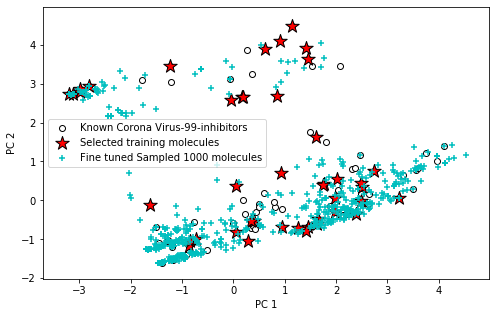

In [48]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:Klen, 0], X[:Klen, 1],
            c='w', edgecolors='k', label='Known Corona Virus-99-inhibitors')
plt.scatter(X[Klen:Klen + Flen, 0], X[Klen:Klen + Flen, 1],
            s=200, c='r', marker='*', edgecolors='k', label='Selected training molecules')
plt.scatter(X[Klen + Flen:, 0], X[Klen + Flen:, 1],
            c='c', marker='+', label='Fine tuned Sampled 1000 molecules')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend();

In [44]:
idxs = []
for Fbv in Fbvs:
    idx = np.argmax(DataStructs.BulkTanimotoSimilarity(Fbv, Sbvs))
    idxs.append(idx)
nsmols = [smols[idx] for idx in idxs]

In [124]:
showmols = []
for i, j in zip(fmols, nsmols):
    showmols.append(i)
    showmols.append(j)
    

### Showing 10 of the generated molecules

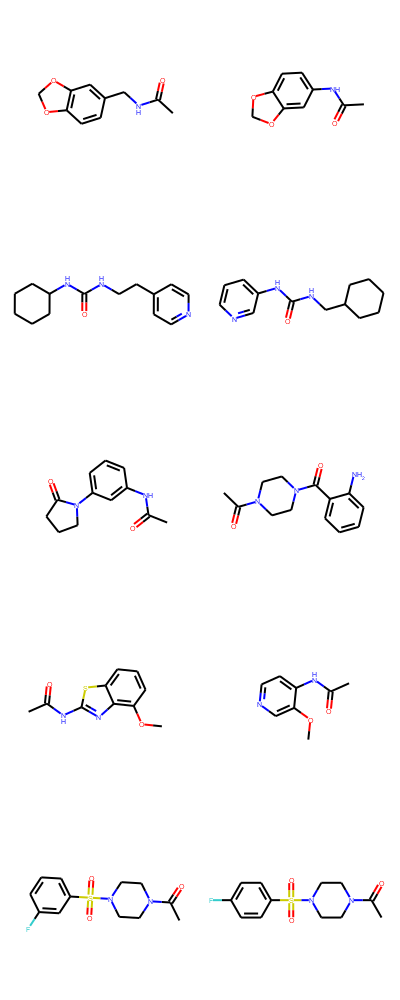

In [47]:
Draw.MolsToGridImage(showmols[:10], molsPerRow=2)

In [ ]:
# Apply PCA and generate compounds, Do heirarchical Clustering / some form of clustering
# 

In [61]:
#these are the generated compounds

# S = sampled
Sfps, Sbvs, smols = [], [], []
for smi in finetuned_sampled_smiles:
    mol = Chem.MolFromSmiles(smi)
    smols.append(mol)
    
    bv = AllChem.GetMACCSKeysFingerprint(mol)
    Sbvs.append(bv)
    
    fp = np.zeros(len(bv))
    DataStructs.ConvertToNumpyArray(bv, fp)
    Sfps.append(fp)

x = Sfps
pca = PCA(n_components=10, random_state=71)
X = pca.fit_transform(x)

### Clustering Setup

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    return labels
#     plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    

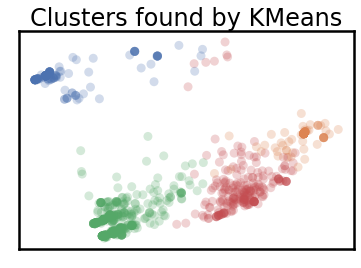

In [83]:
labels_kmeans = plot_clusters(X, cluster.KMeans, (), {'n_clusters':4})
# looks like 4 clusters, I go with 4 clusters

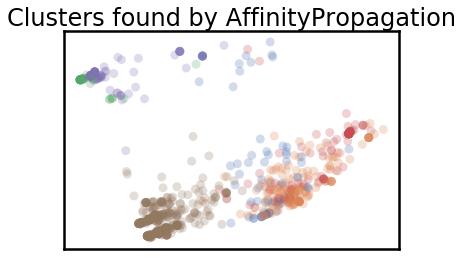

In [84]:
labels_affinity_prop = plot_clusters(X, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})
# 5 clusters auto identified

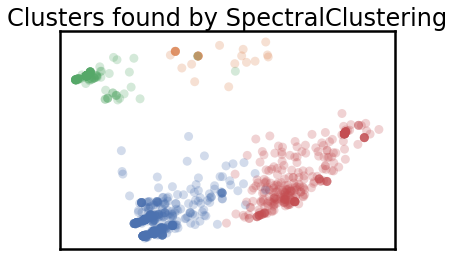

In [85]:
labels_spectral_clustering = plot_clusters(X, cluster.SpectralClustering, (), {'n_clusters':4})


In [82]:
# Generate all the SDF needed for the RDX tool

# BASE CODE

# import pandas as pd
# from rdkit.Chem import PandasTools
# pp = pd.read_csv('anti.smiles', names=['Smiles', 'BA']) 
# PandasTools.AddMoleculeColumnToFrame(pp,'Smiles','Molecule') # pp = doesn't work for me
# PandasTools.WriteSDF(pp, 'pp_out.sdf', molColName='Molecule', properties=list(pp.columns))

pp = pd.read_csv('generated_smiles_finetuned_corona_virus.csv') 
moleculeNum = 1
for x in pp['smiles']:
    ppdf = pd.DataFrame([x], columns = ['smiles'])
    PandasTools.AddMoleculeColumnToFrame(ppdf,'smiles','Molecule') # pp = doesn't work for me
    PandasTools.WriteSDF(ppdf, 'BindingAffinity_Files\sdfFiles\c19_sample_'+str(moleculeNum)+'.sdf', molColName='Molecule', properties=list(ppdf.columns))
    print("Finished Molecule: "+str(moleculeNum))
    moleculeNum +=1
    

Finished Molecule: 1
Finished Molecule: 2
Finished Molecule: 3
Finished Molecule: 4
Finished Molecule: 5
Finished Molecule: 6
Finished Molecule: 7
Finished Molecule: 8
Finished Molecule: 9
Finished Molecule: 10
Finished Molecule: 11
Finished Molecule: 12
Finished Molecule: 13
Finished Molecule: 14
Finished Molecule: 15
Finished Molecule: 16
Finished Molecule: 17
Finished Molecule: 18
Finished Molecule: 19
Finished Molecule: 20
Finished Molecule: 21
Finished Molecule: 22
Finished Molecule: 23
Finished Molecule: 24
Finished Molecule: 25
Finished Molecule: 26
Finished Molecule: 27
Finished Molecule: 28
Finished Molecule: 29
Finished Molecule: 30
Finished Molecule: 31
Finished Molecule: 32
Finished Molecule: 33
Finished Molecule: 34
Finished Molecule: 35
Finished Molecule: 36
Finished Molecule: 37
Finished Molecule: 38
Finished Molecule: 39
Finished Molecule: 40
Finished Molecule: 41
Finished Molecule: 42
Finished Molecule: 43
Finished Molecule: 44
Finished Molecule: 45
Finished Molecule: 

Finished Molecule: 371
Finished Molecule: 372
Finished Molecule: 373
Finished Molecule: 374
Finished Molecule: 375
Finished Molecule: 376
Finished Molecule: 377
Finished Molecule: 378
Finished Molecule: 379
Finished Molecule: 380
Finished Molecule: 381
Finished Molecule: 382
Finished Molecule: 383
Finished Molecule: 384
Finished Molecule: 385
Finished Molecule: 386
Finished Molecule: 387
Finished Molecule: 388
Finished Molecule: 389
Finished Molecule: 390
Finished Molecule: 391
Finished Molecule: 392
Finished Molecule: 393
Finished Molecule: 394
Finished Molecule: 395
Finished Molecule: 396
Finished Molecule: 397
Finished Molecule: 398
Finished Molecule: 399
Finished Molecule: 400
Finished Molecule: 401
Finished Molecule: 402
Finished Molecule: 403
Finished Molecule: 404
Finished Molecule: 405
Finished Molecule: 406
Finished Molecule: 407
Finished Molecule: 408
Finished Molecule: 409
Finished Molecule: 410
Finished Molecule: 411
Finished Molecule: 412
Finished Molecule: 413
Finished Mo

Finished Molecule: 742
Finished Molecule: 743
Finished Molecule: 744
Finished Molecule: 745
Finished Molecule: 746
Finished Molecule: 747
Finished Molecule: 748
Finished Molecule: 749
Finished Molecule: 750
Finished Molecule: 751
Finished Molecule: 752
Finished Molecule: 753
Finished Molecule: 754
Finished Molecule: 755
Finished Molecule: 756
Finished Molecule: 757
Finished Molecule: 758
Finished Molecule: 759
Finished Molecule: 760
Finished Molecule: 761
Finished Molecule: 762
Finished Molecule: 763
Finished Molecule: 764
Finished Molecule: 765
Finished Molecule: 766
Finished Molecule: 767
Finished Molecule: 768
Finished Molecule: 769
Finished Molecule: 770
Finished Molecule: 771
Finished Molecule: 772
Finished Molecule: 773
Finished Molecule: 774
Finished Molecule: 775
Finished Molecule: 776
Finished Molecule: 777
Finished Molecule: 778
Finished Molecule: 779
Finished Molecule: 780
Finished Molecule: 781
Finished Molecule: 782
Finished Molecule: 783
Finished Molecule: 784
Finished Mo

In [ ]:
# select randomly around 20 ligands from all the clusters
for i, j in enumerate(labels_kmeans):
    print(i,j)
    #take i, j , get the molecule and put it in that cluster
    

In [93]:
selectedLabel = labels_kmeans
uniqueLabels = list(set(selectedLabel))
clusterCount = 0
ligand_cluster = []
for clusterNum, ligand in zip(selectedLabel,finetuned_sampled_smiles):
    ligand_cluster.append([ligand, clusterNum])

ligand_cluster = sorted(ligand_cluster, key=lambda ligclu: ligclu[1]) 


# now we have to put each ligand to it's perticular label ( well that's easy )
# Pick 5 of each ligands from each of the labels / clusters
# Then save the ligands as sdf ( 5 at a time )

In [114]:
# sample out 5 ligands/smiles from each cluster and save them as sdf

random.seed(10) # common ligands for each code run

breaker = -1
index_set_for_random_ligands_per_cluster = []
for clusterNum in list(set(selectedLabel)):
    count = 0
    breaker = -1
    for i,[x, y] in enumerate(ligand_cluster):

        if ( y==clusterNum):
            if breaker == -1:
                breaker = i
            count+=1 # count - count of cluster elements
            
    for i in range(5):
        # generate 5 random numbers between the given range
        random_number = random.random()
        index_for_ligand = breaker + int(count*random_number)
        index_set_for_random_ligands_per_cluster.append([index_for_ligand, clusterNum])
        
print(index_set_for_random_ligands_per_cluster)
            

[[86, 0], [65, 0], [87, 0], [31, 0], [123, 0], [234, 1], [217, 1], [168, 1], [204, 1], [184, 1], [380, 2], [743, 2], [766, 2], [274, 2], [695, 2], [907, 3], [856, 3], [833, 3], [924, 3], [873, 3]]


In [122]:
# Generate all the SDF needed for the RDX tool
moleculeCluster = 1
for labl in set(selectedLabel):
    allRandomClusterLigands = [finetuned_sampled_smiles[a[0]] for a in index_set_for_random_ligands_per_cluster if a[1] == labl]
    pp = pd.DataFrame(allRandomClusterLigands, columns = ['smiles']) 
    PandasTools.AddMoleculeColumnToFrame(pp,'smiles','Molecule') # pp = doesn't work for me
    PandasTools.WriteSDF(pp, 'BindingAffinity_Files\sdfFiles\ClusterSampleLigands\sample_5_ligands_cluster_'+str(moleculeCluster)+'.sdf', molColName='Molecule', properties=list(pp.columns))
    print("Processed cluster "+str(moleculeCluster))
    moleculeCluster+=1

Processed cluster 1
Processed cluster 2
Processed cluster 3
Processed cluster 4


In [103]:
random.random()

0.8071888146430749

['OCCOCCO',
 'CC(=O)N1CCN(c2ccccc2)CC1',
 'CC(=O)N1CCN(C(=O)c2ccccc2O)CC1',
 'CC(=O)N1CCN(C(=O)c2ccccc2)CC1',
 'NCc1ccc(NC(N)=O)cc1',
 'CC(=O)N1CCN(C(=O)c2ccc(O)cc2)CC1',
 'N#Cc1ccccc1',
 'O=C(Nc1ccccc1)c1ccoc(=O)c1',
 'CC(=O)N1CCN(C(=O)c2cccc(Cl)n2)CC1',
 'O=C(Nc1ccccc1)c1ccoc(=O)c1',
 'O=C(Nc1ccccc1)N1CCCCS1',
 'CC(=O)N1CCN(S(=O)(=O)C2=CC=CC2=C(C)C)CC1',
 'CC(=O)N1CCN(S(=O)(=O)c2ccccn2)CC1',
 'CC(=O)N1CCN(C(=O)c2ccccc2CN)CC1',
 'NC(=O)CNc1ccccc1',
 'CC(=O)N1CCN(CC2=CC=C(F)C2)CC1',
 'CC(=O)N1CCN(Cc2cccnc2)CC1',
 'CC(=O)N1CCN(C(=O)c2ccccc2)CC1',
 'CC(=O)N1CCN(Cc2ccccc2)CC1',
 'OCCOCCOCCOCO']

In [ ]:
 for x in pp['smiles']:
        ppdf = pd.DataFrame([x], columns = ['smiles'])
        PandasTools.AddMoleculeColumnToFrame(ppdf,'smiles','Molecule') # pp = doesn't work for me
        PandasTools.WriteSDF(ppdf, 'BindingAffinity_Files\sdfFiles\ClusterSampleLigands\c19_sample_'+str(moleculeNum)+'.sdf', molColName='Molecule', properties=list(ppdf.columns))
        print("Finished Molecule: "+str(moleculeNum))
        moleculeNum +=1
    